#Import

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import metrics
import time
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

In [52]:
df = pd.read_csv('/content/dataxuly.csv')

In [53]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [54]:
features = df.drop('Credit_Score', axis=1)
labels = df['Credit_Score']

In [55]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#KNN

In [56]:
knn = KNeighborsClassifier()
start_time_knn = time.time()
# Train KNN classifer
knn.fit(X_train, y_train)
train_time_knn = time.time() - start_time_knn

#Predict the response for dataset 
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy_knn:", accuracy_knn)

Accuracy_knn: 0.77245


In [57]:
#Model Accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred)
test_accuracy_knn = accuracy_score(y_test, y_test_pred)
print("Training Time:", train_time_knn)
print("Training Accuracy:", train_accuracy_knn)
print("Test Accuracy:", test_accuracy_knn)
print("Report: ", classification_report(y_test, y_pred))

Training Time: 0.02690434455871582
Training Accuracy: 0.845025
Test Accuracy: 0.77245
Report:                precision    recall  f1-score   support

           0       0.70      0.71      0.71      3527
           1       0.76      0.81      0.78      5874
           2       0.81      0.77      0.79     10599

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



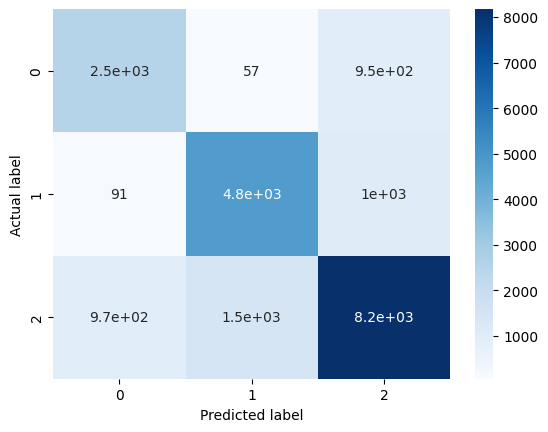

In [58]:
# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_test_pred)

# Heatmap
sns.heatmap(cm_knn, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'KNN Accuracy score: {0}'.format(accuracy_knn)
plt.show()


#SVM

In [59]:
svm = SVC()
start_time_svm = time.time()
# Train SVM classifer
svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time_svm

#Predict the response for dataset 
y_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Accuracy_score
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy_svm:", accuracy_svm)

Accuracy_svm: 0.53285


In [60]:
#Model Accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred)
test_accuracy_svm = accuracy_score(y_test, y_test_pred)
print("Training Time:", train_time_svm)
print("Training Accuracy:", train_accuracy_svm)
print("Test Accuracy:", test_accuracy_svm)
print("Report: ",classification_report(y_test, y_pred))

Training Time: 956.4981646537781
Training Accuracy: 0.5352
Test Accuracy: 0.53285
Report:                precision    recall  f1-score   support

           0       0.47      0.03      0.05      3527
           1       0.50      0.24      0.32      5874
           2       0.54      0.87      0.66     10599

    accuracy                           0.53     20000
   macro avg       0.50      0.38      0.35     20000
weighted avg       0.51      0.53      0.46     20000



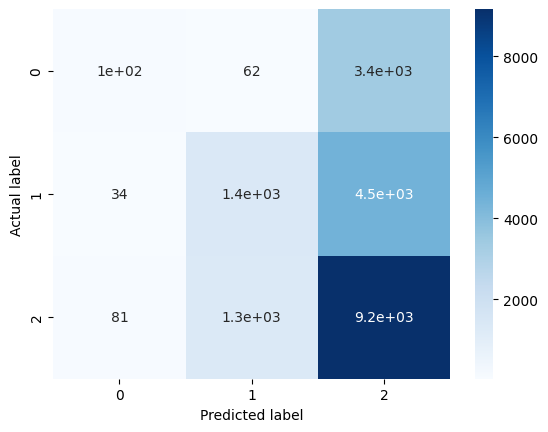

In [61]:
# Confusion matrix
cm_svm = metrics.confusion_matrix(y_test, y_test_pred)

# Heatmap
sns.heatmap(cm_svm, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'SVM Accuracy score: {0}'.format(accuracy_svm)
plt.show()

#RF

In [62]:
rf = RandomForestClassifier()
start_time_rf = time.time()
# Train Random Forest classifer
rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time_rf

#Predict the response for dataset
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test) 

# Accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy_rf:", accuracy_rf)

Accuracy_rf: 0.8274


In [63]:
#Model Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred)
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Training Time:", train_time_rf)
print("Training Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Report: ",classification_report(y_test, y_pred))

Training Time: 34.320295095443726
Training Accuracy: 0.9999875
Test Accuracy: 0.8274
Report:                precision    recall  f1-score   support

           0       0.79      0.79      0.79      3527
           1       0.81      0.85      0.83      5874
           2       0.85      0.83      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



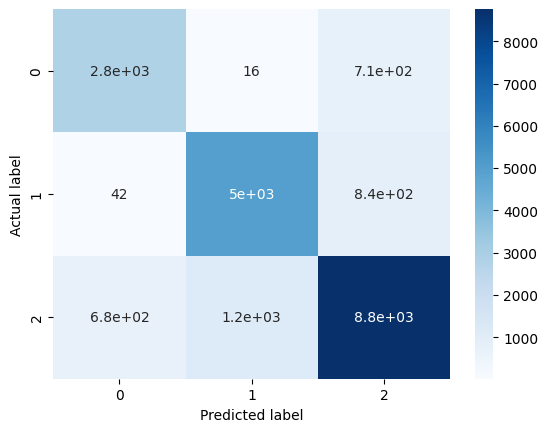

In [64]:
# Confusion matrix
cm_rf = metrics.confusion_matrix(y_test, y_test_pred)

# Heatmap
sns.heatmap(cm_rf, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'Random Forest Accuracy score: {0}'.format(accuracy_rf)
plt.show()

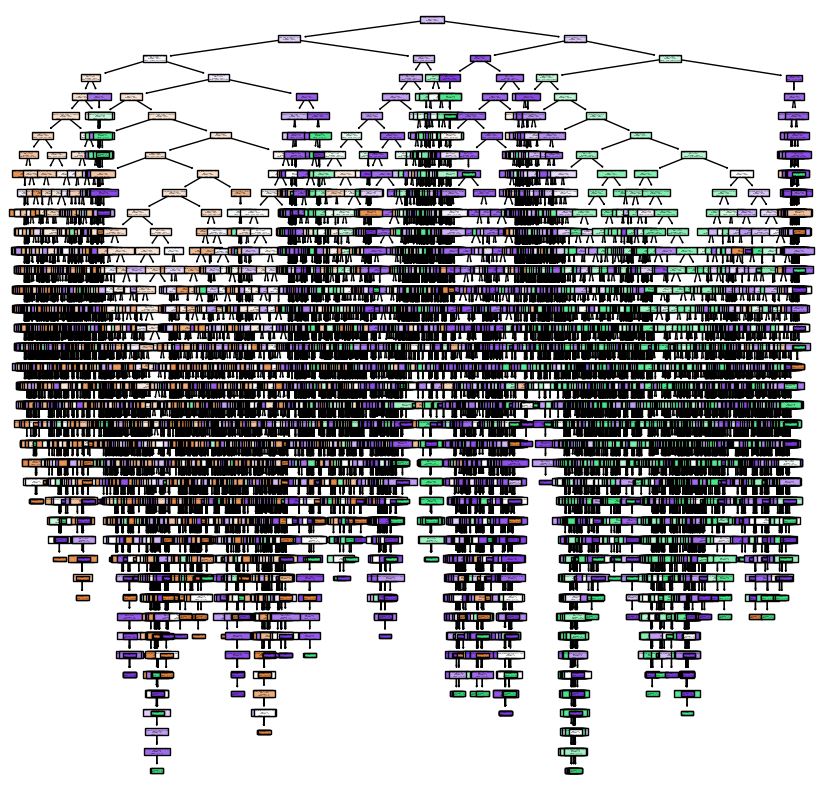

In [65]:
#Tree plot
plt.figure(figsize=(10, 10))
plot_tree(rf.estimators_[0], feature_names=features.columns, filled=True)
plt.show()